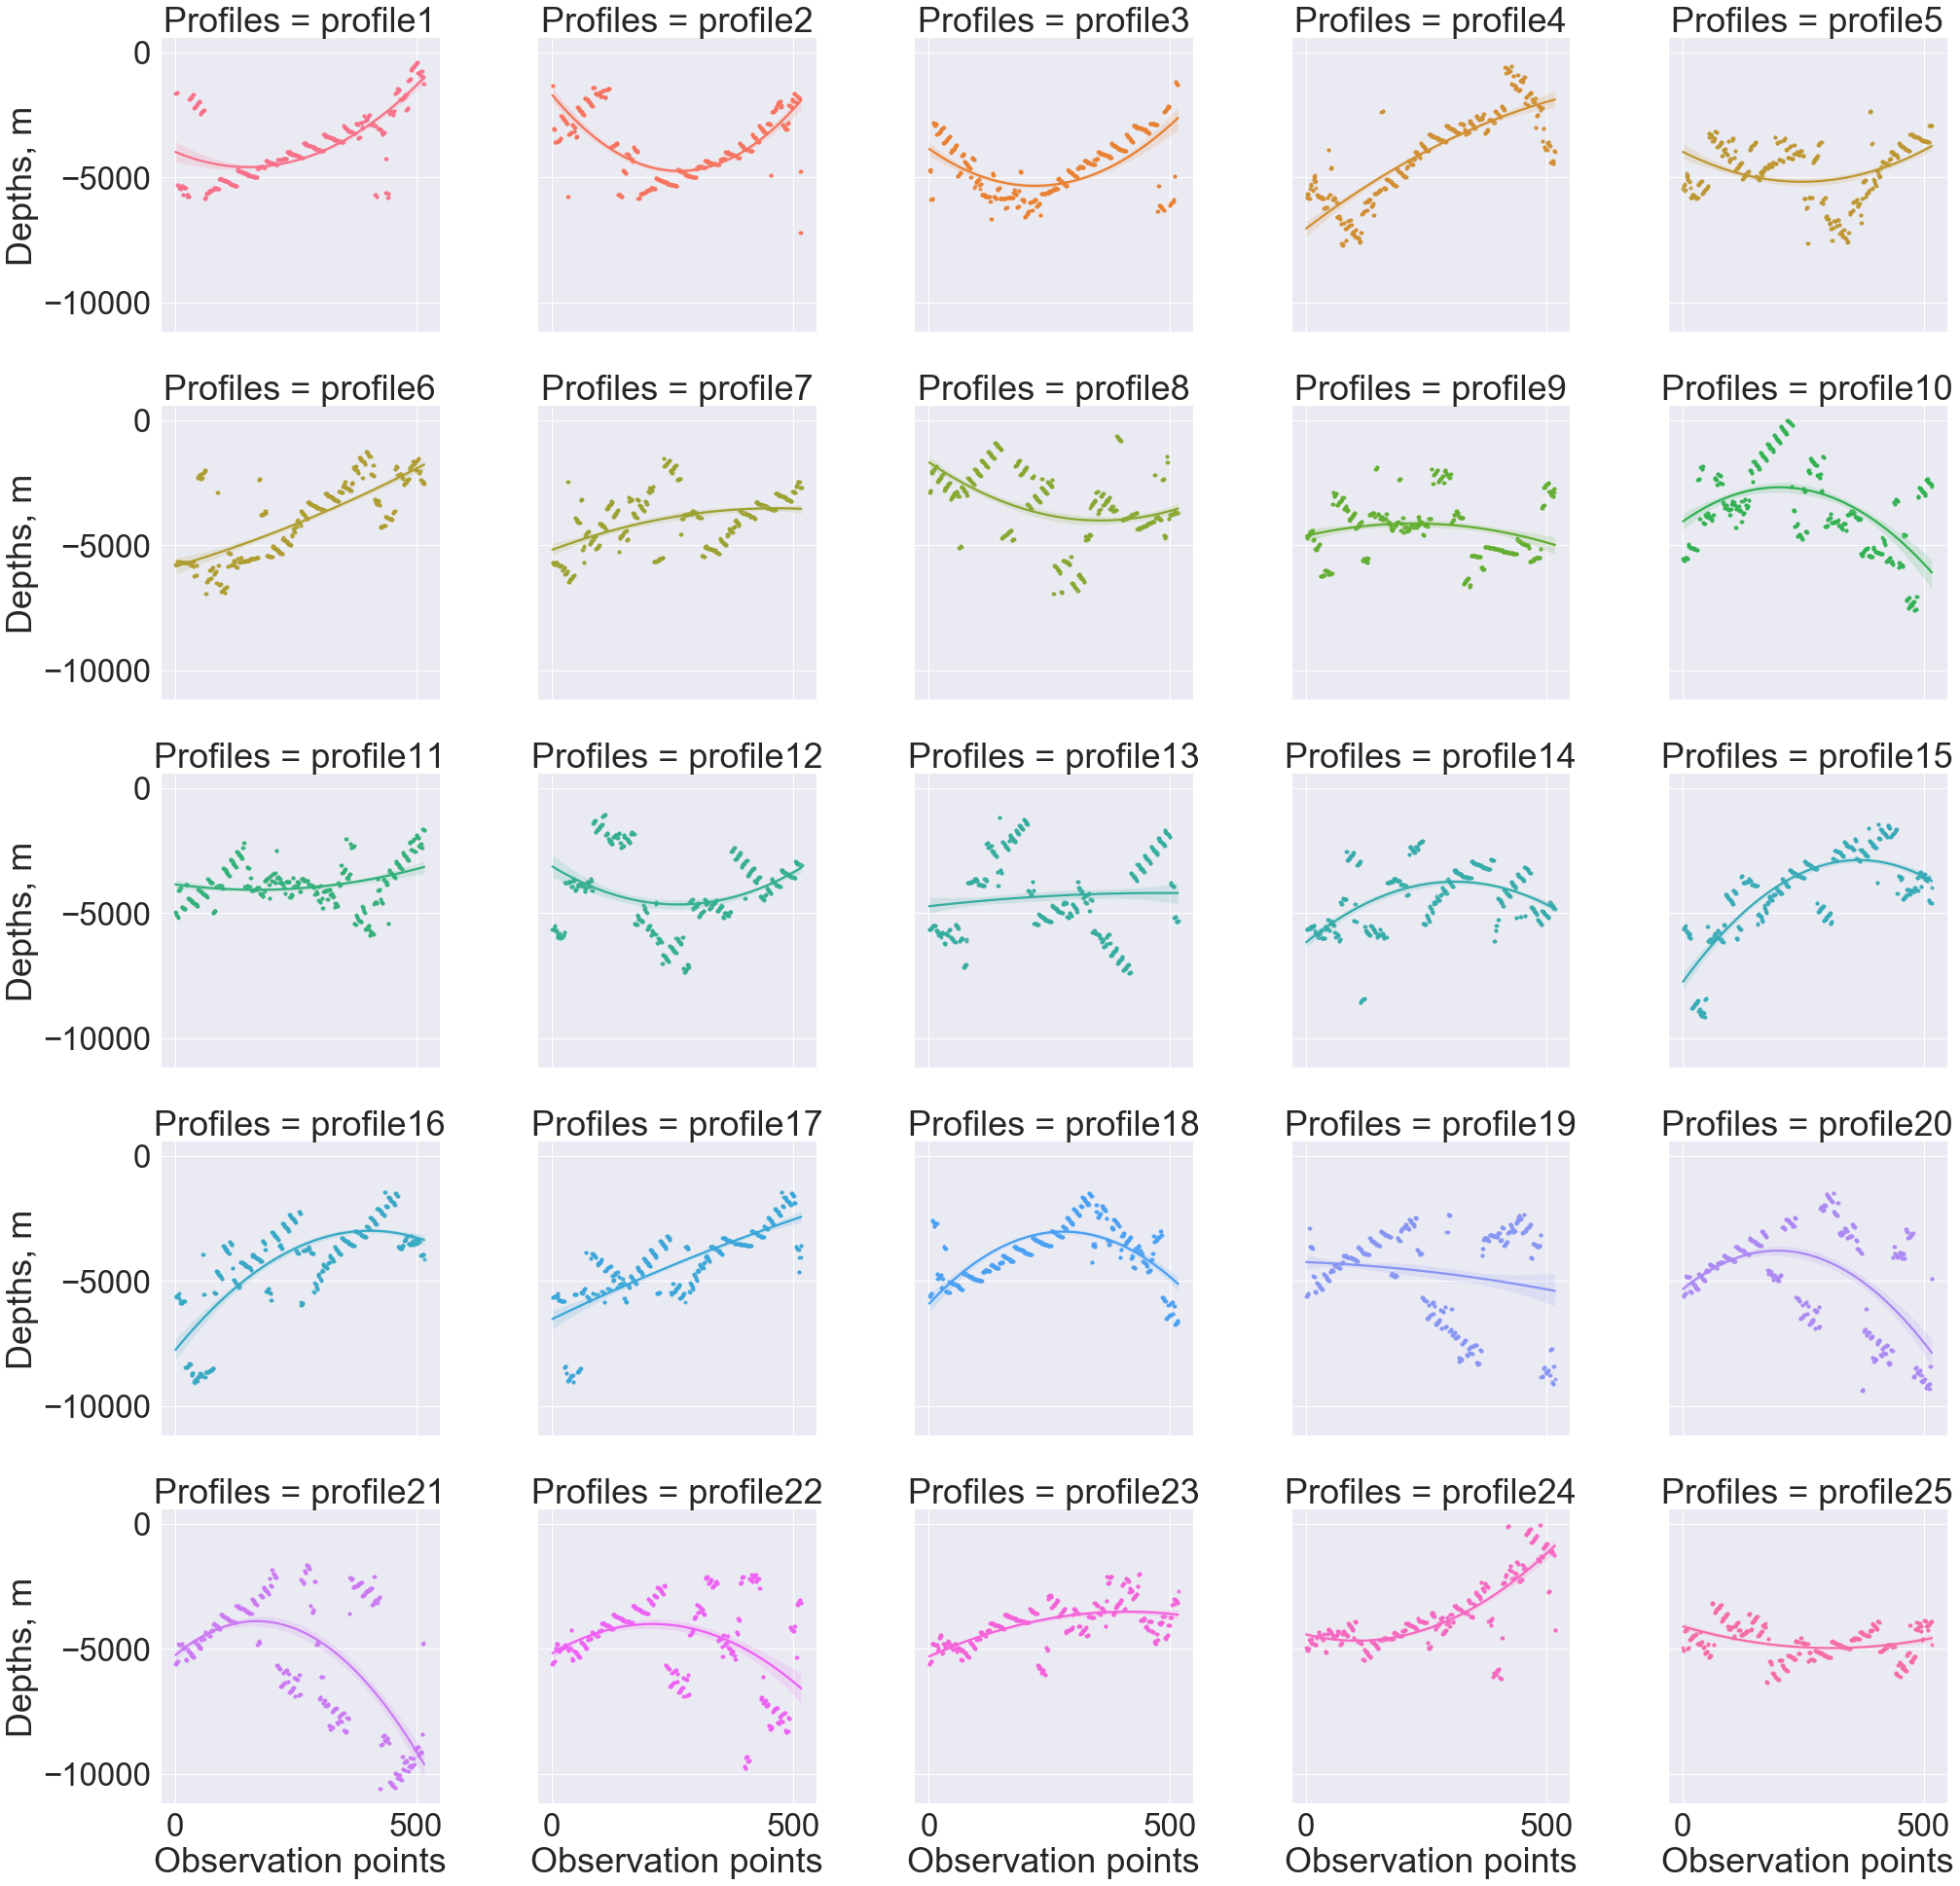

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
sb.set_context("paper")
sb.set(font_scale = 3)

os.chdir('/Users/pauline/Documents/Python')
dfM = pd.read_csv("Tab-Bathy.csv")

# defining loop sequence
profiles_nrs = list(map(lambda x: x, range(25)))
profiles_list = []
for i in profiles_nrs:
    profiles_list.append('profile{}'.format(i + 1))

# defining variables
df = dfM.melt(id_vars = ['observ'],
              value_vars = profiles_list,
              var_name = 'Profiles', value_name = 'Depths'
             )

# plotting
g = sb.lmplot(data=df, x="observ", y="Depths",
              col="Profiles", hue="Profiles", col_wrap=5,
              fit_reg=True, truncate=True,
              x_jitter=True, y_jitter=True,
              scatter=True, markers='.', order=2, height=6
             )
g.set_axis_labels("Observation points", "Depths, m").fig.subplots_adjust(wspace=.04)

# visualizing and saving picture
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, 
                    left=0.10, right=0.95, 
                    hspace=0.25,wspace=0.35
                   )
plt.savefig('plot_FacetGrid.png', dpi=300)
plt.show()